### Survival of Titanic (A Machine Learning Prection)

In [317]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# SK Learn Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Model Evalualtion Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

### Data Processing 

In [318]:
# Import datasets
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [319]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [320]:
train.size

10692

In [321]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [322]:
train.Embarked=train.Embarked.astype('category')

<AxesSubplot:xlabel='Parch'>

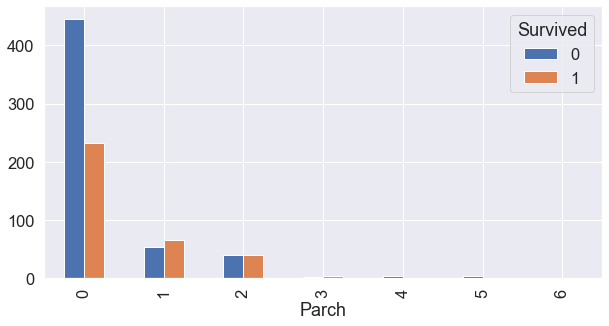

In [323]:
pd.crosstab(train.Parch,train.Survived).plot(kind="bar",figsize=(10,5))

In [324]:
df=train.drop(["PassengerId","Name","Ticket","Fare","Cabin"], axis=1)

<AxesSubplot:>

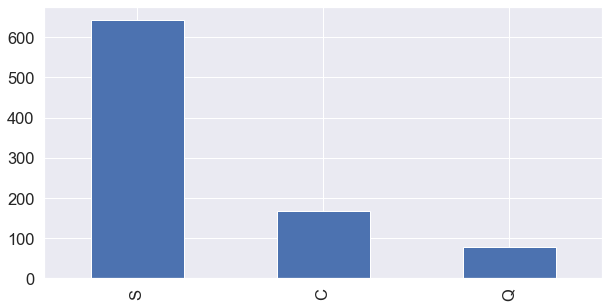

In [325]:
df.Embarked.value_counts().plot(kind='bar',figsize=(10,5))

In [326]:
import math
median_age=math.floor(df.Age.median())
mode_embarked=df.Embarked.mode()[0]


In [327]:
df.Age=df.Age.replace(np.nan,median_age)
df.Embarked=df.Embarked.replace(np.nan, mode_embarked)

In [328]:
df.columns[df.isna().any()]

Index(['Embarked'], dtype='object')

<AxesSubplot:>

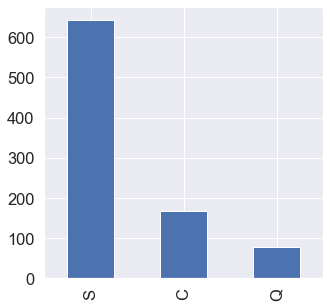

In [329]:
df.Embarked.value_counts().plot(kind='bar',figsize=(5,5))

In [330]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


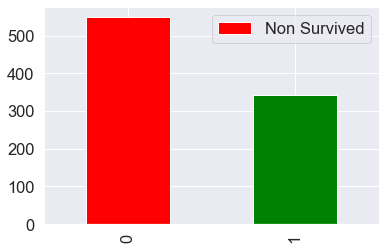

In [331]:
df.Survived.value_counts().plot(kind='bar',color=['red','green']);
plt.legend(["Non Survived", "Survived"])

In [332]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [333]:
dummy=pd.get_dummies(df.Sex)
dummyE=pd.get_dummies(df.Embarked)

In [334]:
mdf=pd.concat([df,dummy,dummyE],axis='columns')
mdf

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,female,male,C,Q,S
0,0,3,male,22.0,1,0,S,0,1,0,0,1
1,1,1,female,38.0,1,0,C,1,0,1,0,0
2,1,3,female,26.0,0,0,S,1,0,0,0,1
3,1,1,female,35.0,1,0,S,1,0,0,0,1
4,0,3,male,35.0,0,0,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,0,1,0,0,1
887,1,1,female,19.0,0,0,S,1,0,0,0,1
888,0,3,female,28.0,1,2,S,1,0,0,0,1
889,1,1,male,26.0,0,0,C,0,1,1,0,0


In [335]:
df=mdf.drop(["Sex","Embarked"],axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,female,male,C,Q,S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


In [336]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
female      0
male        0
C           0
Q           0
S           0
dtype: int64

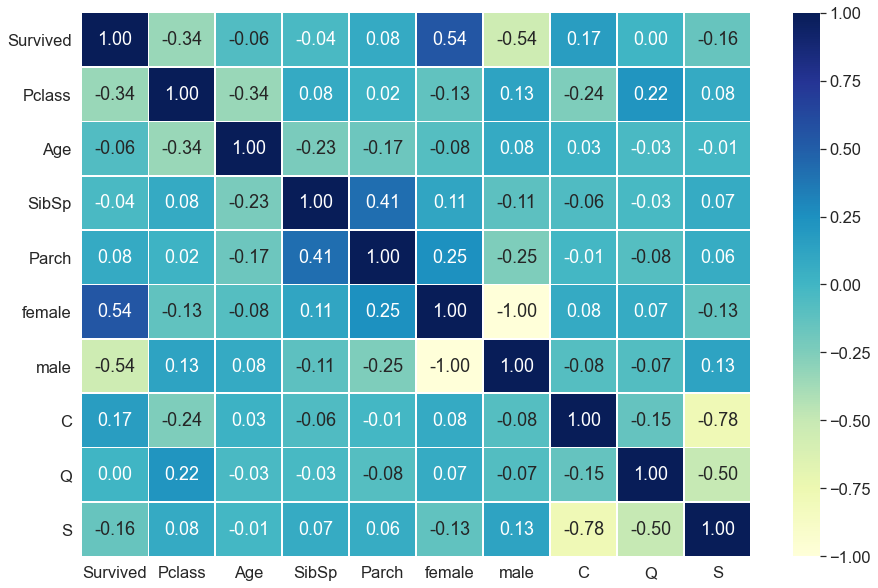

In [337]:
corr_matrix=df.corr()
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

In [338]:
Y=df.Survived
X=df.drop("Survived",axis=1)
np.random.seed(42)
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2)

In [339]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()
                   }

def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    
    np.random.seed(42)
    model_scores={}
    
    for name, model in models.items():
        model.fit(X_train,Y_train)
        model_scores[name]=model.score(X_test,Y_test)
    return model_scores

In [340]:
model_scores=fit_and_score(models=models, X_train=X_train,
                          X_test=X_test,Y_train=Y_train, 
                          Y_test=Y_test)
model_scores

D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


{'Logistic Regression': 0.8044692737430168,
 'KNN': 0.8156424581005587,
 'Random Forest': 0.8100558659217877}

(0.7, 0.852)

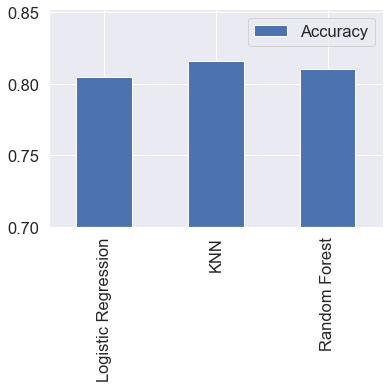

In [341]:
model_compare=pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar()
plt.ylim([0.7, 0.852])

### Hyperparameter Optimization

#### Optimizaiton for KNN

In [427]:
train_scores=[]
test_scores=[]

neighbors=range(1,50)
knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,Y_train)
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))

D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Software\Installed\ANACONDA\lib\site-

D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Software\Installed\ANACONDA\lib\site-

0.8156424581005587

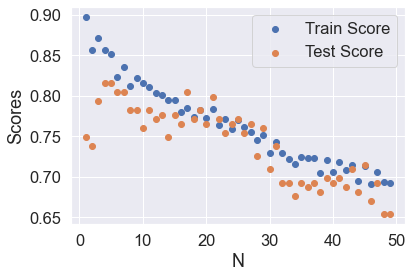

In [430]:
plt.scatter(neighbors,train_scores,label="Train Score")
plt.scatter(neighbors,test_scores,label="Test Score")
plt.xlabel("N")
plt.ylabel("Scores")
plt.legend()
max(test_scores)

### Optimizing Logistic Regression

In [434]:
np.random.seed(42)
rsGrid={"C":np.logspace(-5,5,30)}


rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=rsGrid,
                             cv=5, n_iter=200, verbose=True)
rs_log_reg.fit(X_train,Y_train)

D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 30 is smaller than n_iter=200. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 30 candidates, totalling 150 fits


D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=200,
                   param_distributions={'C': array([1.00000000e-05, 2.21221629e-05, 4.89390092e-05, 1.08263673e-04,
       2.39502662e-04, 5.29831691e-04, 1.17210230e-03, 2.59294380e-03,
       5.73615251e-03, 1.26896100e-02, 2.80721620e-02, 6.21016942e-02,
       1.37382380e-01, 3.03919538e-01, 6.72335754e-01, 1.48735211e+00,
       3.29034456e+00, 7.27895384e+00, 1.61026203e+01, 3.56224789e+01,
       7.88046282e+01, 1.74332882e+02, 3.85662042e+02, 8.53167852e+02,
       1.88739182e+03, 4.17531894e+03, 9.23670857e+03, 2.04335972e+04,
       4.52035366e+04, 1.00000000e+05])},
                   verbose=True)

In [435]:
rs_log_reg.score(X_test,Y_test)

0.8156424581005587

In [436]:
rs_log_reg.best_params_

{'C': 0.028072162039411784}

In [437]:
y_preds_Rs=rs_log_reg.predict(X_test)

D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


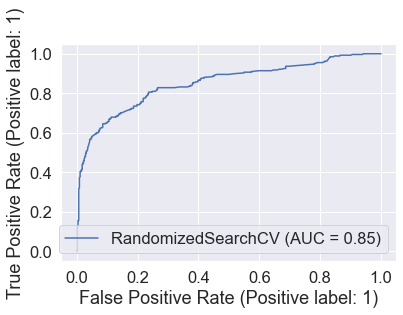

In [438]:
plot_roc_curve(rs_log_reg,X_train,Y_train)

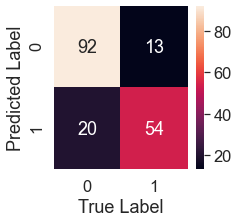

In [439]:
sns.set(font_scale=1.5)
def plot_conf_mat(Y_test,y_preds_Rs):
    fig, ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(Y_test,y_preds_Rs),
                  annot=True,
                  cbar=True)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(Y_test,y_preds_Rs)

### Optimize RandomForest`

In [440]:
rf_grid={"n_estimators":np.arange(10,500,5)}

np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5, n_iter=20, verbose=True)
rs_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'n_estimators': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
       140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200,
       205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265,
       270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330,
       335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395,
       400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460,
       465, 470, 475, 480, 485, 490, 495])},
                   verbose=True)

In [441]:
rs_rf.score(X_test,Y_test)

0.8212290502793296

In [442]:
log_reg_grid={"C": np.logspace(-4,4,30),
             "solver":["liblinear"]}
gs_log_reg=GridSearchCV(LogisticRegression(), param_grid=log_reg_grid,
                       cv=5, verbose=True)
gs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [443]:
gs_log_reg.score(X_test,Y_test)

0.7821229050279329

In [444]:
y_preds=gs_log_reg.predict(X_test)

D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


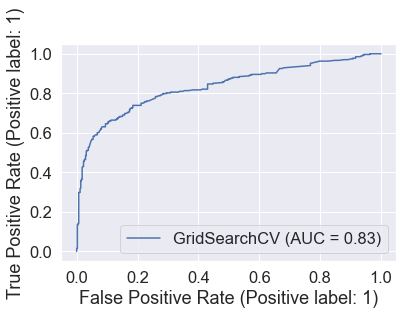

In [445]:
# ROC curve function
plot_roc_curve(gs_log_reg,X_train,Y_train)

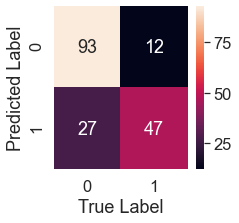

In [446]:
sns.set(font_scale=1.5)
def plot_conf_mat(Y_test,y_preds):
    fig, ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(Y_test,y_preds),
                  annot=True,
                  cbar=True)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(Y_test,y_preds)